In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier

## Importance of Feature Scaling

In [4]:
X, y = load_wine(return_X_y=True, as_frame=True)

X.head(10)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


In [6]:
y.describe()

count    178.000000
mean       0.938202
std        0.775035
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: target, dtype: float64

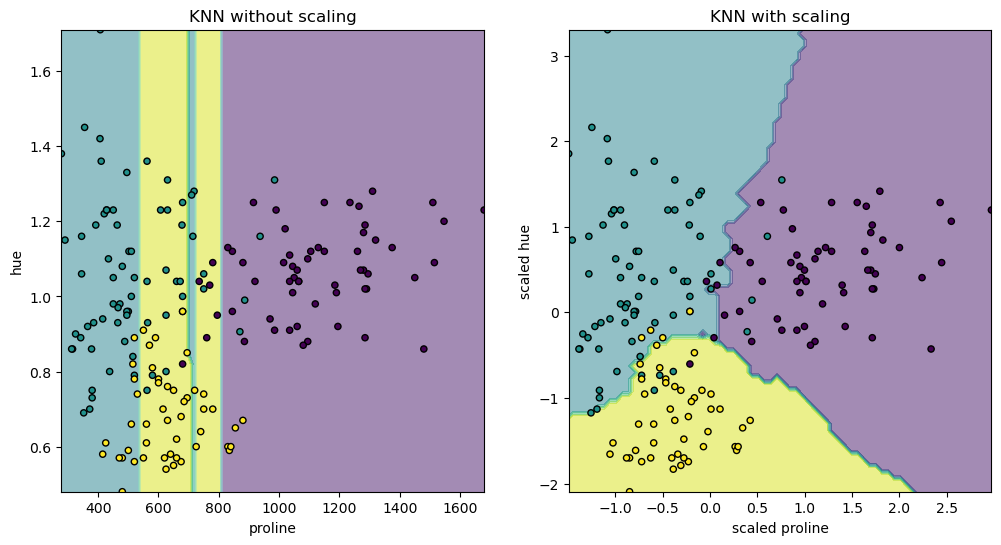

In [2]:
X, y = load_wine(return_X_y=True, as_frame=True)
scaler = StandardScaler().set_output(transform="pandas")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)
scaled_X_train = scaler.fit_transform(X_train)

X_plot = X[["proline", "hue"]]
X_plot_scaled = scaler.fit_transform(X_plot)
clf = KNeighborsClassifier(n_neighbors=20)


def fit_and_plot_model(X_plot, y, clf, ax):
    clf.fit(X_plot, y)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_plot,
        response_method="predict",
        alpha=0.5,
        ax=ax,
    )
    disp.ax_.scatter(X_plot["proline"], X_plot["hue"], c=y, s=20, edgecolor="k")
    disp.ax_.set_xlim((X_plot["proline"].min(), X_plot["proline"].max()))
    disp.ax_.set_ylim((X_plot["hue"].min(), X_plot["hue"].max()))
    return disp.ax_


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

fit_and_plot_model(X_plot, y, clf, ax1)
ax1.set_title("KNN without scaling")

fit_and_plot_model(X_plot_scaled, y, clf, ax2)
ax2.set_xlabel("scaled proline")
ax2.set_ylabel("scaled hue")
_ = ax2.set_title("KNN with scaling")

### Compare the effect of different scalers on data
- MinMaxScaler
- StandardScaler
> https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

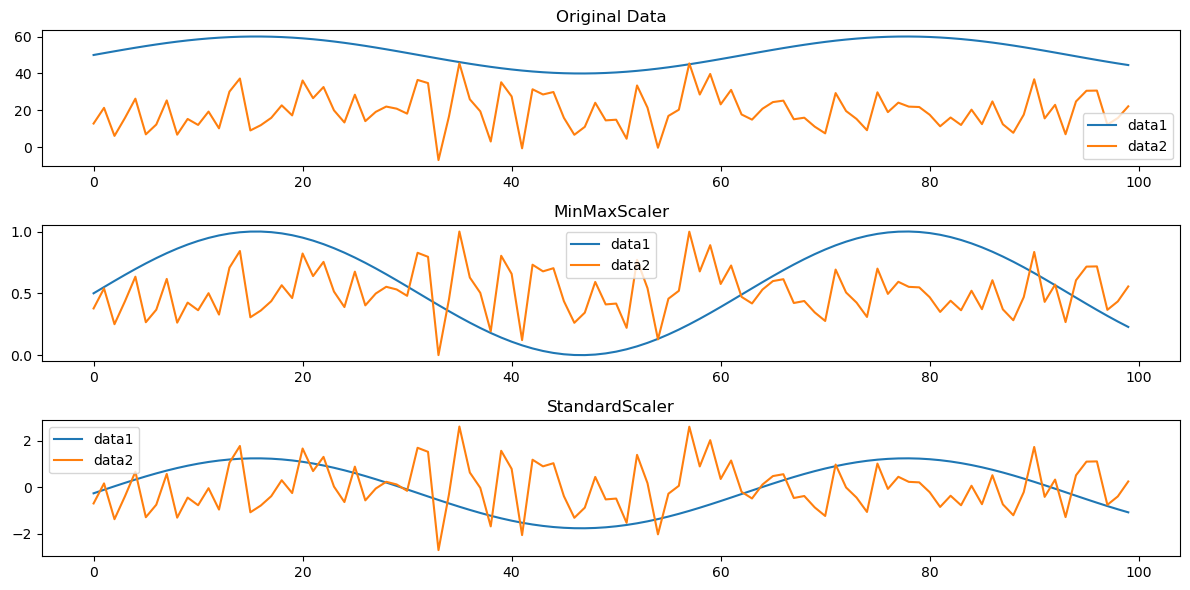

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

# Generate sample time series data
data1 = np.sin(np.linspace(0, 10, 100)) * 10 + 50
data2 = np.random.randn(100) * 10 + 20

# Create a DataFrame
df = pd.DataFrame({'data1': data1, 'data2': data2})

# Apply MinMaxScaler and StandardScaler
df_minmax = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)
df_standard = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)

# Plot the original and scaled data
fig, axes = plt.subplots(3, 1, figsize=(12, 6))
df.plot(ax=axes[0], title='Original Data')
df_minmax.plot(ax=axes[1], title='MinMaxScaler')
df_standard.plot(ax=axes[2], title='StandardScaler')
plt.tight_layout()
plt.show()

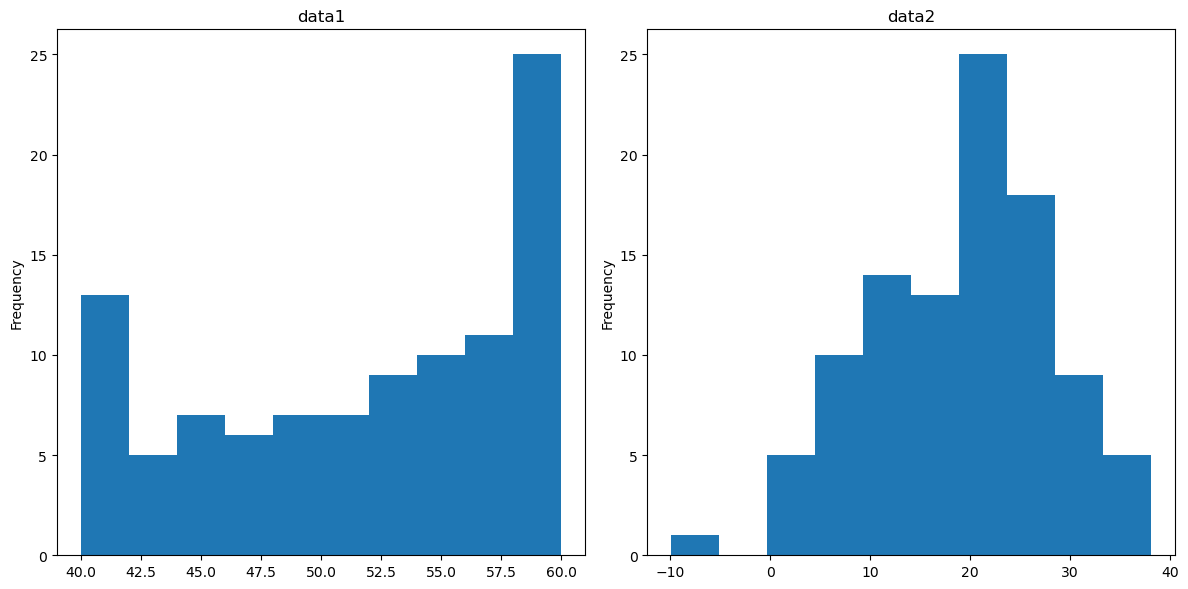

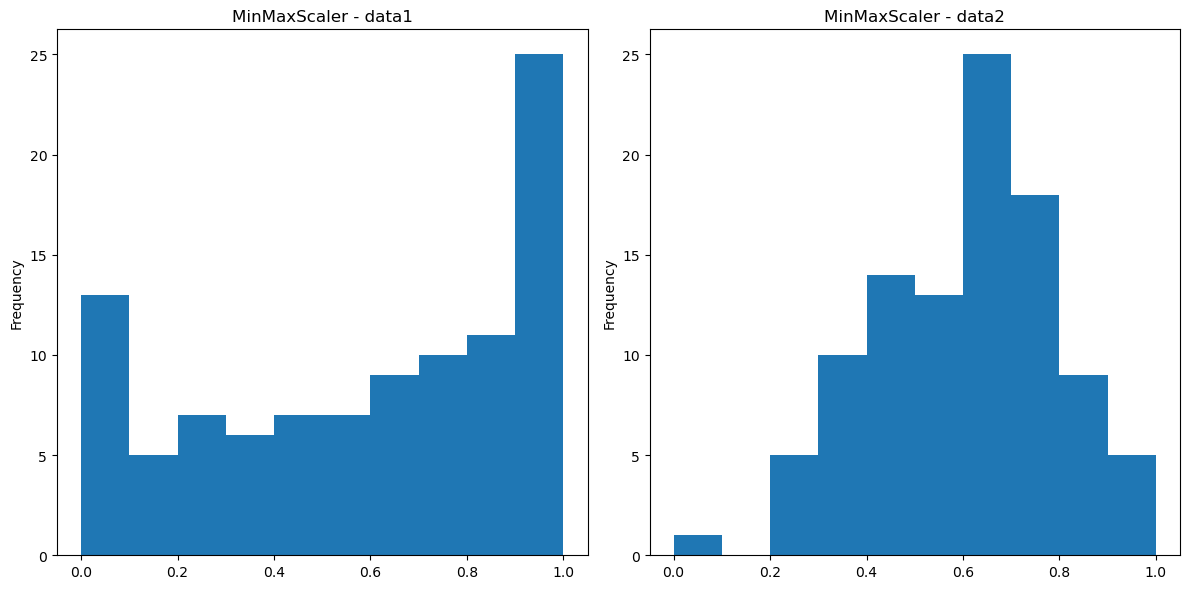

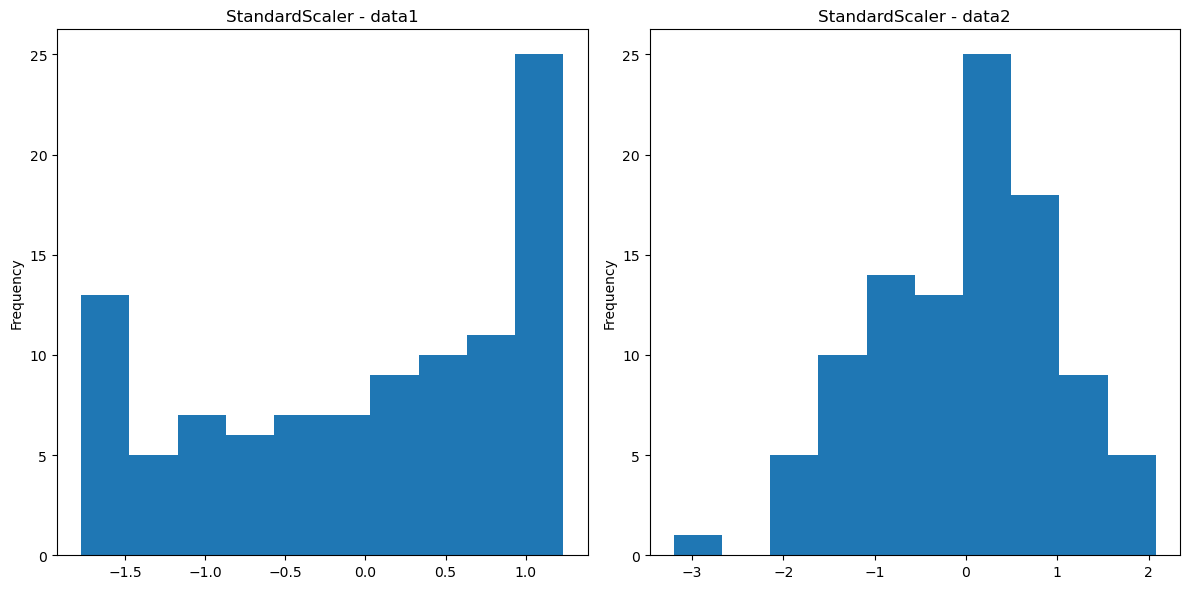

In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

# Generate sample time series data
data1 = np.sin(np.linspace(0, 10, 100)) * 10 + 50
data2 = np.random.randn(100) * 10 + 20

# Create a DataFrame
df = pd.DataFrame({'data1': data1, 'data2': data2})

# Plot the distributions of original data
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
df['data1'].plot.hist(ax=axes[0], title='data1')
df['data2'].plot.hist(ax=axes[1], title='data2')
plt.tight_layout()
plt.show()

# Apply MinMaxScaler and StandardScaler
df_minmax = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)
df_standard = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)

# Plot the distributions of scaled data
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
df_minmax['data1'].plot.hist(ax=axes[0], title='MinMaxScaler - data1')
df_minmax['data2'].plot.hist(ax=axes[1], title='MinMaxScaler - data2')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
df_standard['data1'].plot.hist(ax=axes[0], title='StandardScaler - data1')
df_standard['data2'].plot.hist(ax=axes[1], title='StandardScaler - data2')
plt.tight_layout()
plt.show()

### Key Differences:

- MinMaxScaler: Scales data to a fixed range, typically between 0 and 1. Preserves the original distribution shape but can be sensitive to outliers.
- StandardScaler: Subtracts the mean and scales to unit variance. Transforms the data to have a mean of 0 and a standard deviation of 1. Less sensitive to outliers but can change the distribution shape.

normalization does not necessarily change the original data distribution to a normal distribution. While it can affect the shape and scale of the distribution, it won't magically transform any arbitrary distribution into a perfect bell curve.

Here's a breakdown of the key points:

Different Normalization Techniques: The term "normalization" can refer to various techniques, each with different effects on the data distribution. Some common types include:

MinMaxScaler: This scales data to a specific range, typically between 0 and 1. It preserves the original order of the data but can distort the shape of skewed distributions. (Imagine stretching a skewed bell curve horizontally.)
StandardScaler: This subtracts the mean and divides by the standard deviation of each feature. It centers the data around 0 and scales it to have a unit variance. This can be helpful for some statistical methods that assume normality, but it won't actually make the data normally distributed.
Decimal Scaling: This simply shifts the decimal point of the data without changing its relative values. It has minimal impact on the distribution shape.
Impact on Distribution:

Normalization techniques primarily focus on scaling and centering the data, not transforming its underlying shape.
If the original data already follows a roughly normal distribution, normalization might slightly adjust its spread or location but won't drastically alter its form.
However, for significantly non-normal distributions like highly skewed or multimodal ones, normalization may only change the scale or range without making the data truly normal.
Alternatives for Achieving Normality: If your goal is specifically to achieve normality for statistical analysis, consider these options:

Transformations: Applying specific transformations like log or square root to non-normal data can sometimes make it more closely resemble a normal distribution.
Robust Statistical Methods: Certain statistical methods are less sensitive to deviations from normality and can be used effectively even with non-normal data.
Here's an analogy to illustrate the concept: Imagine you have a collection of mismatched boxes of different sizes and shapes. Normalization is like rescaling all the boxes to fit within a specific container size (e.g., making them all fit on a shelf). While the overall arrangement might look more organized, the fundamental shapes and sizes of the boxes themselves haven't changed.

### hypothesis testing

https://mp.weixin.qq.com/s/gdOQUetaGRTaFncXMN-55Q

https://zhuanlan.zhihu.com/p/184958085

### 信息论，信息熵，互信息，gini， kmeans

### feature importance

### 多重共线性

### shapely value

https://cloud.tencent.com/developer/article/1913745